<a href="https://colab.research.google.com/github/Hero0963/dscamp_titanic-analysis/blob/main/dscamp_lv2_titanic_comparison_finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 專題實作 #01：鐵達尼號存活預測_模型比較與收尾
ref = [link](https://github.com/v123582/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01%EF%BC%9A%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
missing_values = df.isnull().sum()
display(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<ipython-input-4-d9dc6d8362ab>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

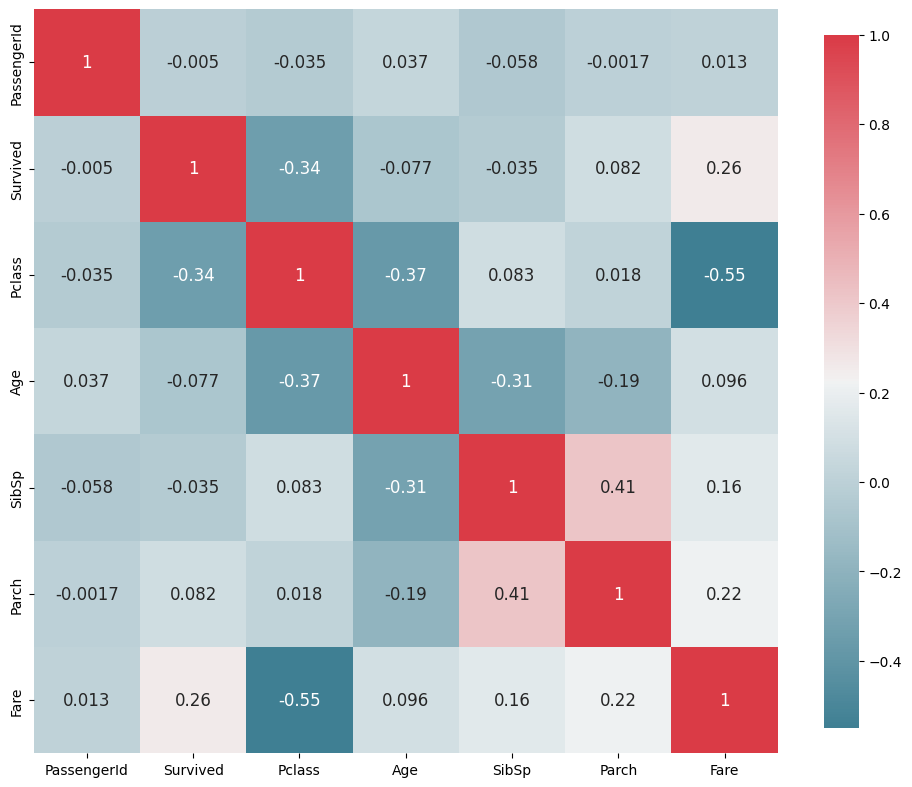

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True,
        annot_kws = { 'fontsize' : 12 }
)


觀察到 Fare 與 Pclass 與 Survived 有顯著關聯

In [ ]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


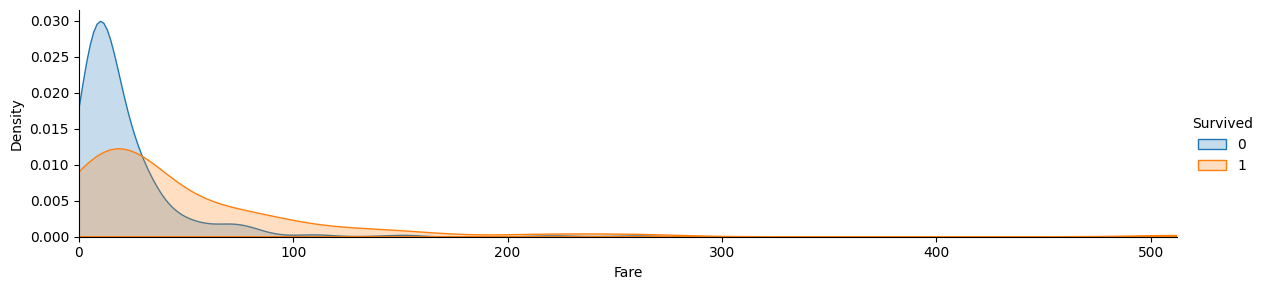

In [ ]:
plot_distribution( df , var = 'Fare' , target = 'Survived' )
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


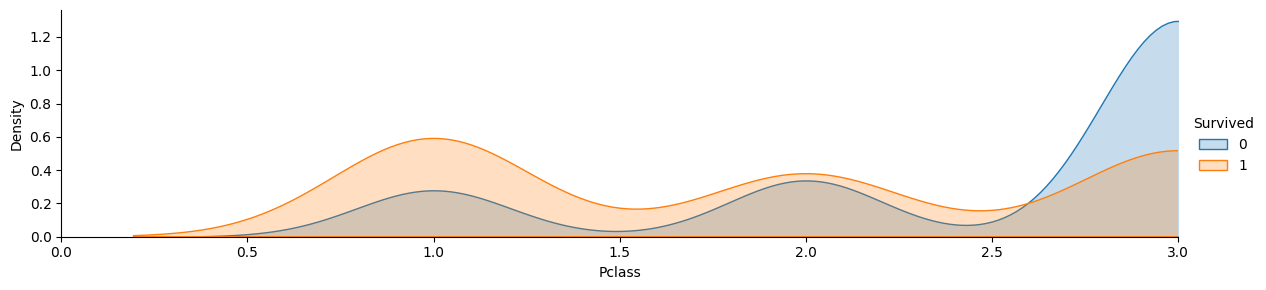

In [ ]:
plot_distribution( df , var = 'Pclass' , target = 'Survived' )
plt.show()

Fare 數值較高者，較有可能生還
Pclass 數值較低者，較有可能生還

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


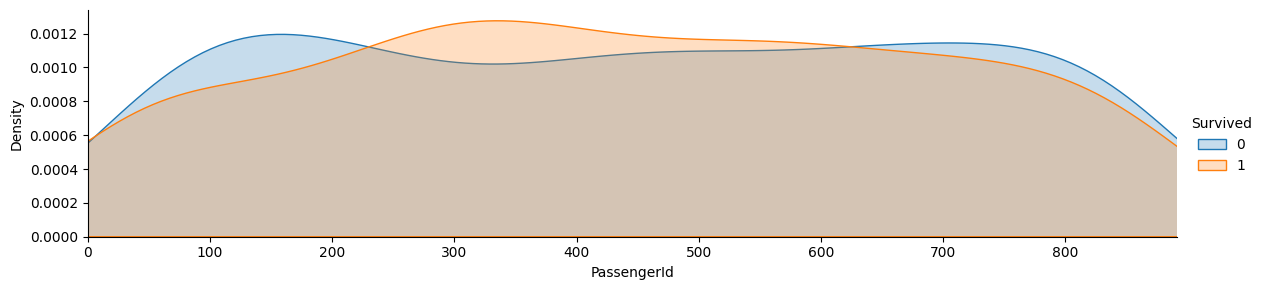

In [ ]:
plot_distribution( df , var = 'PassengerId' , target = 'Survived' )
plt.show()

從乘客名稱抽取出頭銜
身分較高者較有可能生還

In [ ]:
df['Title Row'] = df['Name'].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

In [ ]:
title_encoding = {
  "Capt":       "Officer",
  "Col":        "Officer",
  "Major":      "Officer",
  "Jonkheer":   "Royalty",
  "Don":        "Royalty",
  "Sir" :       "Royalty",
  "Dr":         "Officer",
  "Rev":        "Officer",
  "the Countess":"Royalty",
  "Dona":       "Royalty",
  "Mme":        "Mrs",
  "Mlle":       "Miss",
  "Ms":         "Mrs",
  "Mr" :        "Mr",
  "Mrs" :       "Mrs",
  "Miss" :      "Miss",
  "Master" :    "Master",
  "Lady" :      "Royalty"
}

In [ ]:
df['Title'] = df['Title Row'].map(title_encoding)
df['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
886    Officer
887       Miss
888       Miss
889         Mr
890         Mr
Name: Title, Length: 891, dtype: object

In [ ]:
df_Title_ohe = pd.get_dummies(df['Title'], prefix='Title_')
df_Title_ohe


,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,1,0
887,0,1,0,0,0,0
888,0,1,0,0,0,0
889,0,0,1,0,0,0


In [ ]:
df = df.join(df_Title_ohe)
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title Row,Title,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Officer,0,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Miss,0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Miss,0,1,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Mr,0,0,1,0,0,0


Parch + SibSp = 家庭人數

In [ ]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
display(df['FamilySize'])

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

<Axes: >

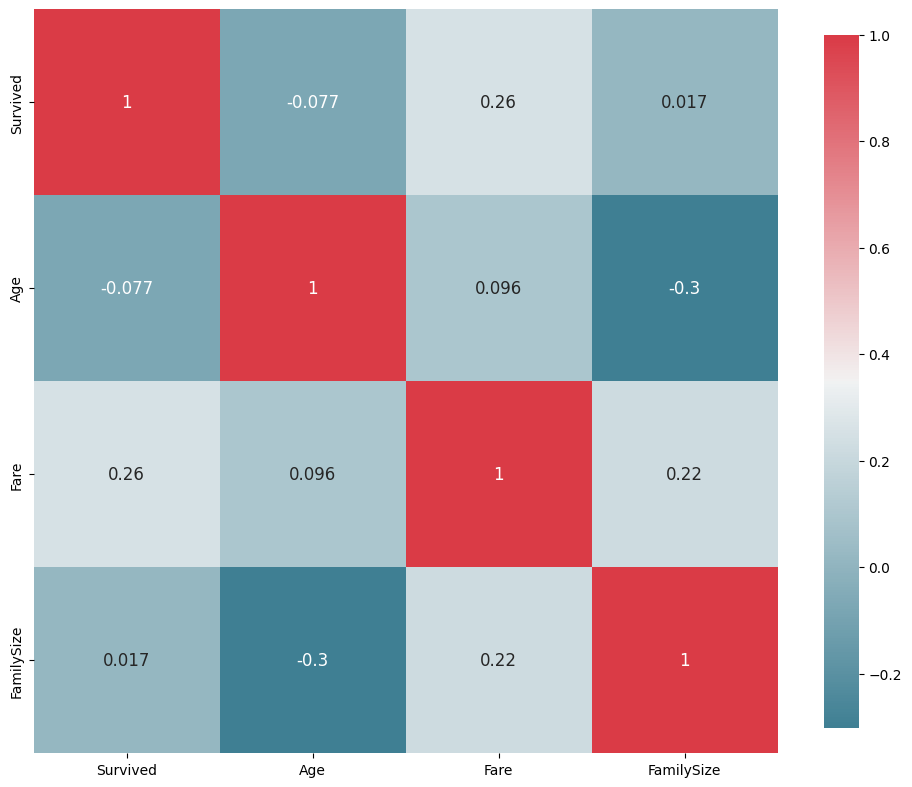

In [ ]:
corr = df[['Survived', 'Age', 'Fare', 'FamilySize']].corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True,
        annot_kws = { 'fontsize' : 12 }
)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


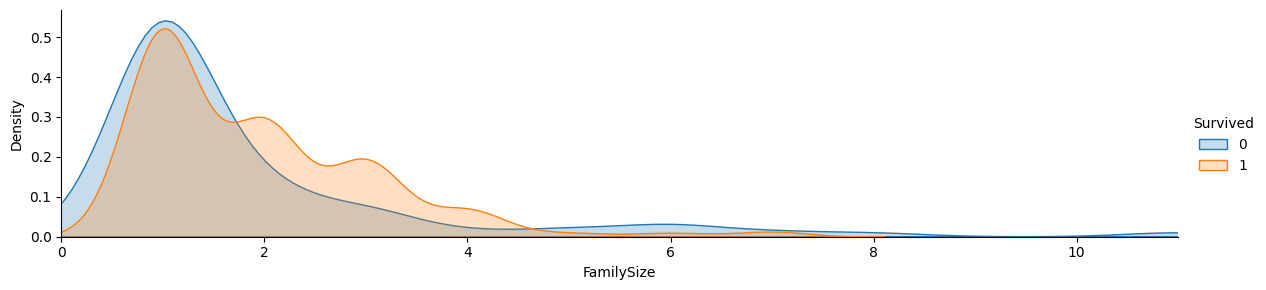

In [ ]:
plot_distribution( df , var = 'FamilySize' , target = 'Survived' )
plt.show()

資料缺失值處理

In [ ]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        891 non-null    object 
 12  Title Row       891 non-null    object 
 13  Title           891 non-null    object 
 14  Title__Master   891 non-null    uint8  
 15  Title__Miss     891 non-null    uint8  
 16  Title__Mr       891 non-null    uint8  
 17  Title__Mrs      891 non-null    uin

None

In [ ]:
df_Embarked_ohe = pd.get_dummies(df['Embarked'], prefix='Embarked_')
df = df.join(df_Embarked_ohe)
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty,FamilySize,Embarked__C,Embarked__Q,Embarked__S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,0,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,0,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,1,0,0,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,1,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,1,0,0,0,0,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,0,1,0,0,0,0,4,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,1,0,0,0,1,1,0,0


Cabin 欄位缺失太多，捨棄

轉換資料型態

In [ ]:
sex_encoding = {
    'male': 0,
    'female': 1
}
df['Sex'] = df['Sex'].map(lambda d: sex_encoding[d])

In [ ]:
bins = [0, 15, 55, float('inf')]
labels = ['Child', 'Adult', 'Elderly']
df['Age_category'] = pd.cut(df['Age'], bins=bins, labels=labels)
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty,FamilySize,Embarked__C,Embarked__Q,Embarked__S,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,2,0,0,1,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,2,1,0,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,0,1,0,0,1,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,0,1,0,0,2,0,0,1,Adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,1,0,0,0,1,0,0,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,...,0,0,0,1,0,1,0,0,1,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,...,1,0,0,0,0,1,0,0,1,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,...,1,0,0,0,0,4,0,0,1,Adult
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,...,0,1,0,0,0,1,1,0,0,Adult


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['AgeLabel'] = label_encoder.fit_transform(df['Age_category'])
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty,FamilySize,Embarked__C,Embarked__Q,Embarked__S,Age_category,AgeLabel
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,2,0,0,1,Adult,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,2,1,0,0,Adult,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,1,0,0,1,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,1,0,0,2,0,0,1,Adult,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,1,0,0,0,1,0,0,1,Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,...,0,0,1,0,1,0,0,1,Adult,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,...,0,0,0,0,1,0,0,1,Adult,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,...,0,0,0,0,4,0,0,1,Adult,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,...,1,0,0,0,1,1,0,0,Adult,0


模型分析

In [ ]:
display(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title Row', 'Title',
       'Title__Master', 'Title__Miss', 'Title__Mr', 'Title__Mrs',
       'Title__Officer', 'Title__Royalty', 'FamilySize', 'Embarked__C',
       'Embarked__Q', 'Embarked__S', 'Age_category', 'AgeLabel'],
      dtype='object')

In [ ]:
columns_X = [
       'Pclass', 'Sex', 'AgeLabel', 'Fare',
       'Embarked__C', 'Embarked__Q', 'Embarked__S',
]
columns_y = ['Survived']

train_X = df[columns_X]
train_y = df[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.75977654 0.79213483 0.76404494 0.76404494 0.78651685]
0.7733036218693115


In [ ]:
columns_X = [
       'Pclass', 'Sex', 'Age', 'Fare',
       'Embarked__C', 'Embarked__Q', 'Embarked__S',
]
columns_y = ['Survived']

train_X = df[columns_X]
train_y = df[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.78212291 0.78651685 0.78089888 0.76966292 0.79213483]
0.7822672776348002


In [ ]:
columns_X = [
       'Pclass', 'Sex', 'Age', 'Fare',
       'SibSp', 'Parch',
       'Embarked__C', 'Embarked__Q', 'Embarked__S',
       'Title__Master', 'Title__Miss', 'Title__Mr', 'Title__Mrs', 'Title__Officer', 'Title__Royalty'
]
columns_y = ['Survived']

train_X = df[columns_X]
train_y = df[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.83798883 0.82022472 0.80337079 0.79775281 0.86516854]
0.8249011361496453


In [ ]:
columns_X = [
       'Pclass', 'Sex', 'Age', 'Fare',
       'Embarked__C', 'Embarked__Q', 'Embarked__S',
       'Title__Master', 'Title__Miss', 'Title__Mr', 'Title__Mrs', 'Title__Officer', 'Title__Royalty'
]
columns_y = ['Survived']

train_X = df[columns_X]
train_y = df[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.78212291 0.80898876 0.80898876 0.76966292 0.8258427 ]
0.7991212102190698


使用 sklearn 套件內，不同 model

In [ ]:

# machine learning
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [ ]:
# logistic regression
log = LogisticRegression(random_state=0)
scores_1 = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# Support Vector Machines
svc = SVC()
scores_2 = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# Decision Tree
decision_tree = DecisionTreeClassifier()
scores_3 = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_4 = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# Gaussian Naive Baye
gaussian = GaussianNB()
scores_5 = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
scores_6 = cross_val_score(rf, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Support Vector Machines',
              'Decision Tree',
              'KNN',
              'Naive Bayes',
              'RandomForestClassifier' ],
    'Score': [scores_1, scores_2, scores_3, scores_4, scores_5, scores_6]})

models

,Model,Score
0,Logistic Regression,0.797998
1,Support Vector Machines,0.672381
2,Decision Tree,0.777811
3,KNN,0.726194
4,Naive Bayes,0.780020
5,RandomForestClassifier,0.802461


使用 GridSearchCV 來尋找較優參數

In [ ]:
from sklearn.model_selection import GridSearchCV

svc = SVC()
Parameters = {
    'C' : [ 1.5, 2, 2.5],
    'gamma' : [0.05,0.1],
    'kernel' : ['rbf']
}

clf= GridSearchCV(svc, Parameters, cv = 5, n_jobs = 6)
clf.fit(train_X, train_y)
print(clf.best_params_)
# Result: C = 2, gamma = 0.1 if using Gaussian Kernel

scores_7 = cross_val_score(svc, train_X, train_y.values.ravel(), cv=5,scoring='accuracy').mean()
print(scores_7)

{'C': 2.5, 'gamma': 0.05, 'kernel': 'rbf'}
0.6723808925993346


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
rf = RandomForestClassifier(n_estimators=100)
Parameters = {
  'max_depth' : [6, 8],
  'n_estimators': [50, 10],
  'max_features': ['sqrt', 'auto'],
  'min_samples_split': [3, 10],
  'min_samples_leaf': [3, 10],
  'bootstrap': [True, False],
}

rf = GridSearchCV(rf, Parameters,cv = 5)
scores_8 = cross_val_score(rf, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_8)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

0.8159625886636119


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Support Vector Machines',
              'Decision Tree',
              'KNN',
              'Naive Bayes',
              'RandomForestClassifier',
              'Support Vector Machines  (Opt)',
              'RandomForestClassifier (Opt)'
              ],
    'Score': [scores_1, scores_2, scores_3, scores_4, scores_5, scores_6, scores_7, scores_8]})


display(models)

,Model,Score
0,Logistic Regression,0.797998
1,Support Vector Machines,0.672381
2,Decision Tree,0.777811
3,KNN,0.726194
4,Naive Bayes,0.780020
5,RandomForestClassifier,0.802461
6,Support Vector Machines (Opt),0.672381
7,RandomForestClassifier (Opt),0.815963


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2)

print(X_train.shape) # (547, 15)
print(y_train.shape)
print(X_test.shape) # (137, 15)
print(y_test.shape)

import tensorflow as tf
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=2)

print(y_train_onehot.shape)
print(y_test_onehot.shape)

(712, 13)
(712, 1)
(179, 13)
(179, 1)
(712, 2)
(179, 2)


使用深度學習模型
缺_調整模型層數 + 參數

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout_rate):
        super(Model, self).__init__()
        self.dropout_rate = dropout_rate
        self.num_layers = num_layers

        self.input_norm = nn.BatchNorm1d(input_size)

        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input_size, hidden_size))

        for _ in range(num_layers - 1):
            self.hidden_layers.append(nn.Linear(hidden_size, hidden_size))

        self.predict = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.input_norm(x)

        for i in range(self.num_layers):
            x = self.hidden_layers[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout_rate, training=self.training)

        output = F.softmax(self.predict(x), dim=1)
        return output

# 模型、優化器初始化
input_size = X_test.shape[1]
hidden_size = 32
output_size = 2
num_layers = 2
dropout_rate = 0.1
model = Model(input_size, hidden_size, output_size, num_layers, dropout_rate)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.CrossEntropyLoss()

# 資料格式轉成torch專用格式
x_data = torch.tensor(X_train.values, dtype=torch.float32) # [120, 4]
y_data = torch.tensor(y_train_onehot, dtype=torch.float32) # [120, 3]
x_test_data = torch.tensor(X_test.values, dtype=torch.float32) # [120, 4]
y_test_data = torch.tensor(y_test_onehot, dtype=torch.float32) # [120, 3]


batch_size = 16
num_epochs = 100
num_batches = len(X_train) // batch_size
loss_list = []
test_loss_list = []

for epoch in range(num_epochs):
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        prediction = model(x_data[start:end])
        loss = loss_func(prediction, y_data[start:end])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss = loss_func(model(x_data), y_data)
    loss_list.append(loss.item())

    test_loss = loss_func(model(x_test_data), y_test_data)
    test_loss_list.append(test_loss.item())

    # print(loss)

print(' ===== done =====')

print(loss_list)
print(test_loss_list)

 ===== done =====
[0.6975238919258118, 0.6861703395843506, 0.6775710582733154, 0.668337345123291, 0.6582439541816711, 0.6492693424224854, 0.6391518712043762, 0.6326844096183777, 0.6226218342781067, 0.6147748827934265, 0.6042680740356445, 0.5998679995536804, 0.5891130566596985, 0.5825408101081848, 0.5736526250839233, 0.5695935487747192, 0.5657168030738831, 0.5530440211296082, 0.55298912525177, 0.5481377243995667, 0.5391704440116882, 0.5405218005180359, 0.5385546088218689, 0.5293511152267456, 0.5298479199409485, 0.5243389010429382, 0.5263368487358093, 0.5247049927711487, 0.5213521718978882, 0.517977774143219, 0.514863908290863, 0.5166283249855042, 0.5178626179695129, 0.5139556527137756, 0.5123314261436462, 0.5145933628082275, 0.5085939764976501, 0.5084956884384155, 0.509427011013031, 0.5123510360717773, 0.5043792128562927, 0.5070713758468628, 0.5097908973693848, 0.5019315481185913, 0.5061280727386475, 0.5021454691886902, 0.5032020211219788, 0.5036440491676331, 0.5025467872619629, 0.50029

Text(0, 0.5, 'BCE Loss')

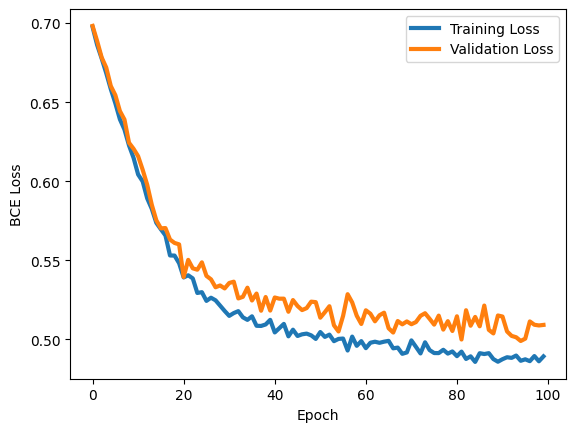

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list, linewidth=3)
plt.plot(test_loss_list, linewidth=3)
plt.legend(("Training Loss", "Validation Loss"))
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")

In [ ]:
x_test_data = torch.tensor(X_test.values, dtype=torch.float32)
y_pred = model(x_test_data)
y_pred = y_pred.argmax(1) # one hot array to int array
accuracy_score(y_test, y_pred.detach().numpy()) # accuracy

0.8156424581005587

#小結

1. 使用 GridSearchCV 來尋找較優參數

2. 學到先保留所有 features，初步挑選幾組分數高的再跑多個模型 的手法

3. 學到對姓名處理，提取特徵

4. 學到從熱力圖 觀察到 Fare 與 Pclass 與 Survived 有顯著關聯

5. 畫 distribution 進行資料探索

6. 學到組合特徵成家庭人數來探索

7. 我將 Age 分成 3 組後。進行 label encoding，效果不佳

8. 調整深度學習的神路網路模型 ，加入了 BatchNorm1d、num_layers 、dropout_rate
accuracy_score = 0.82
深度學習模型適合處理更大的數據及特徵

